In [87]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import warnings 
warnings.filterwarnings('ignore')

In [28]:
df = pd.read_csv("data_999.csv")
df

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,age,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize
0,4,28,3890,4,25,2122,2,16,1944,4,...,16,1,1,1,12,1,10,2,1,2
1,4,2,8118,1,36,2890,2,35,4777,3,...,16,2,1,2,7,0,70,2,1,4
2,3,7,5784,1,33,4373,4,41,3242,1,...,17,2,1,1,4,3,60,1,1,3
3,2,23,5081,3,11,6837,2,37,5521,1,...,13,2,1,2,4,5,70,2,1,5
4,2,36,3215,2,13,7731,3,5,4156,4,...,19,2,2,3,10,1,10,2,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,3,26,7445,2,17,2154,4,3,3071,2,...,16,1,1,1,7,4,60,2,1,5
995,4,22,4834,2,16,3973,4,37,2942,1,...,25,2,1,1,2,1,10,1,1,3
996,2,1,2366,3,16,5125,2,3,16366,4,...,16,1,1,1,2,2,70,2,1,4
997,3,20,14355,4,7,4727,4,1,13286,4,...,24,2,1,1,12,1,10,1,1,2


In [29]:
df.isna().sum()

Q1A            0
Q1I            0
Q1E            0
Q2A            0
Q2I            0
              ..
orientation    0
race           0
voted          0
married        0
familysize     0
Length: 171, dtype: int64

In [31]:
df.describe()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,age,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,...,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,2.446446,21.755756,5396.042042,1.953954,21.674675,4128.198198,2.260260,22.000000,5473.644645,1.828829,...,25.312312,1.613614,1.068068,1.165165,4.512513,1.678679,52.682683,1.603604,1.249249,2.669670
std,1.039734,12.145923,20342.065091,1.069659,12.041897,6599.449329,1.050018,12.085699,11100.606434,1.020693,...,11.819050,0.487165,0.251989,0.458441,3.552299,1.184340,19.024570,0.511420,0.556378,1.520399
min,1.000000,1.000000,214.000000,1.000000,1.000000,208.000000,1.000000,1.000000,185.000000,1.000000,...,13.000000,1.000000,1.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000
25%,2.000000,11.000000,2518.000000,1.000000,11.000000,2231.500000,1.000000,12.000000,2673.500000,1.000000,...,17.000000,1.000000,1.000000,1.000000,2.000000,1.000000,60.000000,1.000000,1.000000,2.000000
50%,2.000000,22.000000,3356.000000,2.000000,22.000000,3047.000000,2.000000,22.000000,3604.000000,1.000000,...,21.000000,2.000000,1.000000,1.000000,4.000000,1.000000,60.000000,2.000000,1.000000,2.000000
75%,3.000000,33.000000,4815.500000,3.000000,32.000000,4386.000000,3.000000,33.000000,5159.500000,2.000000,...,29.000000,2.000000,1.000000,1.000000,7.000000,2.000000,60.000000,2.000000,1.000000,3.000000
max,4.000000,42.000000,595299.000000,4.000000,42.000000,126646.000000,4.000000,42.000000,201526.000000,4.000000,...,85.000000,2.000000,2.000000,3.000000,12.000000,5.000000,70.000000,2.000000,3.000000,13.000000


---

## DF1: DAAS21 A-Scale Results
The original data is a full DAAS but I used the DAAS21 (only containing 21 questions and 14 of them are associated with anxiety)  <br>
Sum all 14 columns in df1 and judge by the A-Scale:<br>
normal: 1-4 <br>
mild: 5-6 <br>
moderate:7-8 <br>
severe:9-10 <br>
extremely severe: 11+ <br>
reference: https://www.hgmc.com.au/pdf/dass.pdf

In [45]:
df1 = pd.DataFrame([df.Q22A, df.Q3A, df.Q42A, df.Q6A, df.Q12A, df.Q10A, 
                   df.Q39A, df.Q8A, df.Q26A, df.Q35A, df.Q31A, df.Q17A,
                   df.Q18A, df.Q38A]).transpose()
df1['Total'] = df1.sum(axis=1)
df1

,Q22A,Q3A,Q42A,Q6A,Q12A,Q10A,Q39A,Q8A,Q26A,Q35A,Q31A,Q17A,Q18A,Q38A,Total
0,4,2,4,4,4,1,4,4,4,4,4,3,4,2,48
1,3,2,2,4,2,2,2,4,3,2,2,4,2,2,36
2,3,4,4,3,1,4,2,3,1,3,4,4,2,4,42
3,1,2,2,3,1,3,3,2,2,1,3,3,1,1,28
4,3,3,3,2,4,3,3,4,4,3,3,4,4,3,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,2,4,4,4,3,3,3,2,4,3,3,4,3,4,46
995,3,4,4,2,4,4,4,4,4,4,4,4,3,4,52
996,3,2,4,4,3,4,3,4,4,4,2,4,4,4,49
997,4,4,4,4,4,4,4,4,3,1,4,4,1,3,48


In [46]:
df1['Total'].describe() 

count    999.000000
mean      34.564565
std       10.439327
min       14.000000
25%       27.000000
50%       34.000000
75%       42.000000
max       56.000000
Name: Total, dtype: float64

even min is an "extremely severe"...let's just treat this as the anxiety score...<br>


---

## DF2: Self-reported Ten Item Personality Inventory

TIPI1	Extraverted, enthusiastic. <br>
TIPI2	Critical, quarrelsome. <br>
TIPI3	Dependable, self-disciplined.<br>
TIPI4	Anxious, easily upset. <br>
TIPI5	Open to new experiences, complex. <br>
TIPI6	Reserved, quiet. <br>
TIPI7	Sympathetic, warm. <br>
TIPI8	Disorganized, careless. <br>
TIPI9	Calm, emotionally stable. <br>
TIPI10	Conventional, uncreative. <br>
<br>
The TIPI items were rated "I see myself as:" _____ such that<br>
<br>
1 = Disagree strongly<br>
2 = Disagree moderately<br>
3 = Disagree a little<br>
4 = Neither agree nor disagree<br>
5 = Agree a little<br>
6 = Agree moderately<br>
7 = Agree strongly <br>
<br>
Scoring (“R” denotes reverse-scored items):: Extraversion: 1, 6R; Agreeableness: 2R, 7; Conscientiousness; 3, 8R; Emotional Stability: 4R, 9; Openness to Experiences: 5, 10R.<br>
reference:http://gosling.psy.utexas.edu/scales-weve-developed/ten-item-personality-measure-tipi/

In [53]:
df2 = pd.DataFrame([df.TIPI1, df.TIPI2, df.TIPI3, df.TIPI4, df.TIPI5, 
                   df.TIPI6, df.TIPI7, df.TIPI8, df.TIPI9, df.TIPI10]).transpose()
df2['Extraversion']=(df2['TIPI1']-df2['TIPI6'])/2
df2['Agreeableness']=(df2['TIPI7']-df2['TIPI2'])/2
df2['Conscientiousness']=(df2['TIPI3']-df2['TIPI8'])/2
df2['EmotionalStability']=(df2['TIPI9']-df2['TIPI4'])/2
df2['OpennessToExperiences']=(df2['TIPI10']-df2['TIPI5'])/2
df2

,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,Extraversion,Agreeableness,Conscientiousness,EmotionalStability,OpennessToExperiences
0,1,5,7,7,7,7,7,5,1,1,-3.0,1.0,1.0,-3.0,-3.0
1,6,5,4,7,5,4,7,7,1,5,1.0,1.0,-1.5,-3.0,0.0
2,2,5,2,2,5,6,5,5,3,2,-2.0,0.0,-1.5,0.5,-1.5
3,1,1,7,4,6,4,6,1,6,1,-1.5,2.5,3.0,1.0,-2.5
4,2,5,3,6,5,5,5,6,3,3,-1.5,0.0,-1.5,-1.5,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,2,5,3,5,2,6,5,3,3,2,-2.0,0.0,0.0,-1.0,0.0
995,1,4,3,6,5,7,6,6,4,4,-3.0,1.0,-1.5,-1.0,-0.5
996,4,6,5,7,3,6,2,6,1,6,-1.0,-2.0,-0.5,-3.0,1.5
997,2,2,1,7,5,7,1,3,3,5,-2.5,-0.5,-1.0,-2.0,0.0


In [44]:
df2.describe()

,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,Extraversion,Agreeableness,Conscientiousness,Emotional Stability,Openness to Experiences
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,3.479479,4.324324,4.604605,5.037037,5.042042,5.117117,5.026026,4.252252,3.473473,3.153153,-0.818819,0.350851,0.176176,-0.781782,-0.944444
std,1.978170,1.812039,1.812564,1.858639,1.665467,1.775839,1.745686,1.923495,1.862252,1.803350,1.629883,1.375522,1.537765,1.607824,1.365429
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.500000,-3.000000,-3.500000,-3.500000,-3.000000
25%,2.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,2.000000,2.000000,-2.000000,-0.500000,-1.000000,-2.000000,-2.000000
50%,3.000000,5.000000,5.000000,5.000000,5.000000,6.000000,5.000000,5.000000,3.000000,3.000000,-1.000000,0.500000,0.000000,-1.000000,-1.000000
75%,5.000000,6.000000,6.000000,7.000000,6.000000,7.000000,6.000000,6.000000,5.000000,4.000000,0.000000,1.000000,1.000000,0.500000,0.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,3.000000,3.500000,3.500000,3.000000,3.500000


---

## DF3: Other factors

**education:**		"How much education have you completed?", 1=Less than high school, 2=High school, 3=University degree, 4=Graduate degree <br>
**urban:**				"What type of area did you live when you were a child?", 1=Rural (country side), 2=Suburban, 3=Urban (town, city)<br>
**gender:**				"What is your gender?", 1=Male, 2=Female, 3=Other<br>
**engnat:**				"Is English your native language?", 1=Yes, 2=No<br>
**age:**					"How many years old are you?"<br>
**hand:**			"What hand do you use to write with?", 1=Right, 2=Left, 3=Both<br>
**religion:**			"What is your religion?", 1=Agnostic, 2=Atheist, 3=Buddhist, 4=Christian (Catholic), 5=Christian (Mormon), 6=Christian (Protestant), 7=Christian (Other), 8=Hindu, 9=Jewish, 10=Muslim, 11=Sikh, 12=Other<br>
**orientation:**			"What is your sexual orientation?", 1=Heterosexual, 2=Bisexual, 3=Homosexual, 4=Asexual, 5=Other<br>
**race:**				"What is your race?", 10=Asian, 20=Arab, 30=Black, 40=Indigenous Australian, 50=Native American, 60=White, 70=Other<br>
**voted:**				"Have you voted in a national election in the past year?", 1=Yes, 2=No<br>
**married:**				"What is your marital status?", 1=Never married, 2=Currently married, 3=Previously married<br>
**familysize:**			"Including you, how many children did your mother have?"<br>

In [48]:
df3 = pd.DataFrame([df.education, df.urban, df.gender, df.engnat, df.age,
                   df.hand, df.religion, df.orientation, df.race, df.voted,
                   df.married, df.familysize]).transpose()
df3

,education,urban,gender,engnat,age,hand,religion,orientation,race,voted,married,familysize
0,2,3,2,2,16,1,12,1,10,2,1,2
1,2,3,2,1,16,2,7,0,70,2,1,4
2,2,3,2,2,17,1,4,3,60,1,1,3
3,1,3,2,1,13,2,4,5,70,2,1,5
4,3,2,2,2,19,3,10,1,10,2,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
994,1,1,2,1,16,1,7,4,60,2,1,5
995,3,2,2,2,25,1,2,1,10,1,1,3
996,1,3,2,2,16,1,2,2,70,2,1,4
997,4,3,1,2,24,1,12,1,10,1,1,2


---

## Multiple Linear Regression Test1: personality and anxiety score
train data: 700, test data: 299

In [68]:
MLR1 = pd.DataFrame([df1.Total, df2.Extraversion, df2.Agreeableness,
                         df2.Conscientiousness, df2.EmotionalStability,
                         df2.OpennessToExperiences]).transpose()
x = MLR1.drop('Total',axis=1)
y = MLR1['Total']
MLR1

,Total,Extraversion,Agreeableness,Conscientiousness,EmotionalStability,OpennessToExperiences
0,48.0,-3.0,1.0,1.0,-3.0,-3.0
1,36.0,1.0,1.0,-1.5,-3.0,0.0
2,42.0,-2.0,0.0,-1.5,0.5,-1.5
3,28.0,-1.5,2.5,3.0,1.0,-2.5
4,46.0,-1.5,0.0,-1.5,-1.5,-1.0
...,...,...,...,...,...,...
994,46.0,-2.0,0.0,0.0,-1.0,0.0
995,52.0,-3.0,1.0,-1.5,-1.0,-0.5
996,49.0,-1.0,-2.0,-0.5,-3.0,1.5
997,48.0,-2.5,-0.5,-1.0,-2.0,0.0


In [71]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [78]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
MLR1_model = LR.fit(x_train,y_train)

In [79]:
y_prediction =  LR.predict(x_test)
y_prediction

array([40.08957171, 19.65121987, 29.95150252, 37.98216398, 29.23811074,
       35.74586467, 43.02064078, 22.92777854, 33.7784313 , 20.75055335,
       38.42106171, 36.24520251, 32.63601081, 31.59950239, 33.28980634,
       35.03616121, 25.36158689, 43.01001005, 21.3390119 , 26.89926032,
       37.92051182, 32.41382203, 22.19011653, 39.58376192, 35.90359598,
       30.41329366, 20.89217974, 43.16770571, 38.18645632, 31.69032165,
       42.82225176, 31.28734904, 32.52051748, 40.29164905, 31.71933482,
       37.04841059, 39.57441502, 31.64902052, 31.30530075, 22.76660365,
       41.9537532 , 42.24547857, 40.71083918, 38.21728065, 33.99879292,
       41.78877738, 34.7549448 , 35.9125442 , 21.39738525, 40.21615179,
       34.23209843, 34.99998049, 26.36847954, 39.49386346, 38.961302  ,
       34.07779985, 33.09538302, 35.35400879, 34.35997272, 30.96925104,
       28.06506068, 37.09970939, 30.44049051, 29.71775183, 40.17727476,
       28.16268447, 32.06943355, 39.78598751, 35.61652623, 33.33

In [83]:
len(y_prediction)

200

In [76]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print("r2 socre is",score)
print("mean_sqrd_error is==",mean_squared_error(y_test,y_prediction))
print("root_mean_squared error of is==",np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 socre is 0.3842921451280613
mean_sqrd_error is== 69.18703008117427
root_mean_squared error of is== 8.317874132323372


(0.0, 80.0)

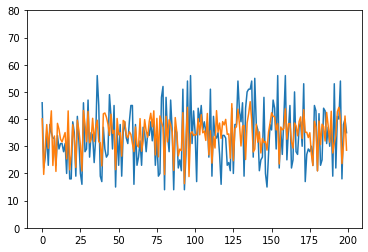

In [97]:
x = np.arange(200)
y1 = y_test
y2 = y_prediction

plt.plot(x,y1,y2)
plt.ylim(0,80)